# Dataset 1 preparation

Here we prepare the dataset fot the geosteering task. 
As a basic input, we use the expoted profiles along the synthethic horizontal wells from Groningen oilfield Petrel project.
The approach uses several extractions of well logs with different values of KB.
Tree  sections with petrophysical parameters were exported: Porosity (df_poro), Water Saturation (df_Sw), shale volume (df_Vsh)

In [30]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt

In [72]:
# Impors .csv files with the data of Porosity, water saturation (Sw)
#data_path_root = 'C:/Users/georgy.peshkov/Documents/Geosteering/Modeling/'
df_poro = pd.read_csv ('Dataset 1/Input data/Groningen dataset PROCESSED_PORO.csv',low_memory=False,header=None)
df_Sw = pd.read_csv ('Dataset 1/Input data/Groningen dataset PROCESSED_Sw.csv', low_memory=False, header=None)
df_Vsh = pd.read_csv ('Dataset 1/Input data/Groningen dataset PROCESSED_Vsh.csv', low_memory=False, header=None)




In [73]:
# prepare the eaqule size of the dataframe
df_poro = df_poro.drop(df_poro.columns[[200, 201]], axis=1)

In [74]:
# we clean and rotate the dataframe before make it an array, and make the numbers as float
df_poro = df_poro.iloc[:, 1::2]
df_poro = df_poro.astype(float)
arr_poro = np.array(df_poro)
arr_poro = np.rot90(arr_poro, k=1, axes=(0, 1))


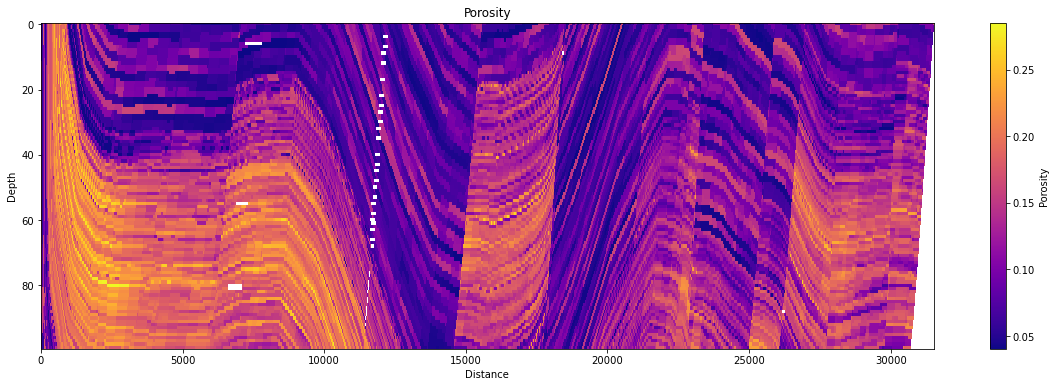

In [75]:
# we plot the array as a section with porosity distribution
fig1, ax = plt.subplots()
fig1.set_size_inches(20,6)
plt.title('Porosity')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw1 = ax.imshow(arr_poro, aspect='auto', interpolation = 'nearest', cmap = 'plasma')
bar = plt.colorbar(shw1)
bar.set_label('Porosity')



In [76]:
# we clean and rotate the dataframe before make it an array, and make the numbers as float

df_Sw = df_Sw.iloc[:, 1::2]
df_Sw = df_Sw.astype(float)
arr_Sw = np.array(df_Sw )
arr_Sw = np.rot90(arr_Sw, k=1, axes=(0, 1))
# np.ones_like(df_Sw.values)-

In [77]:
oil_Sw = np.array(np.ones_like(df_Sw.values)-df_Sw.values )
oil_Sw = np.rot90(oil_Sw)
# np.ones_like(df_Sw.values)-

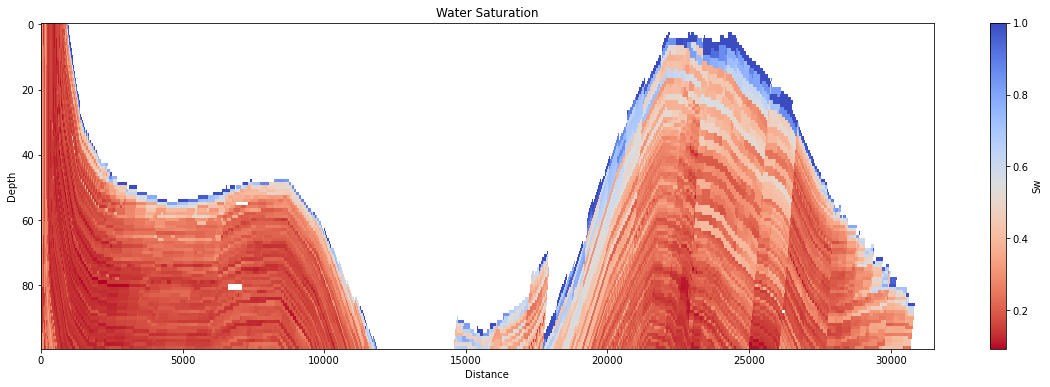

In [78]:
# we plot the array as a section with Sw distribution
fig2, ax = plt.subplots()
fig2.set_size_inches(20,6)
plt.title('Water Saturation')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw2 = ax.imshow(arr_Sw, aspect='auto', interpolation = 'nearest', cmap = 'coolwarm_r')
bar = plt.colorbar(shw2)
bar.set_label('Sw')

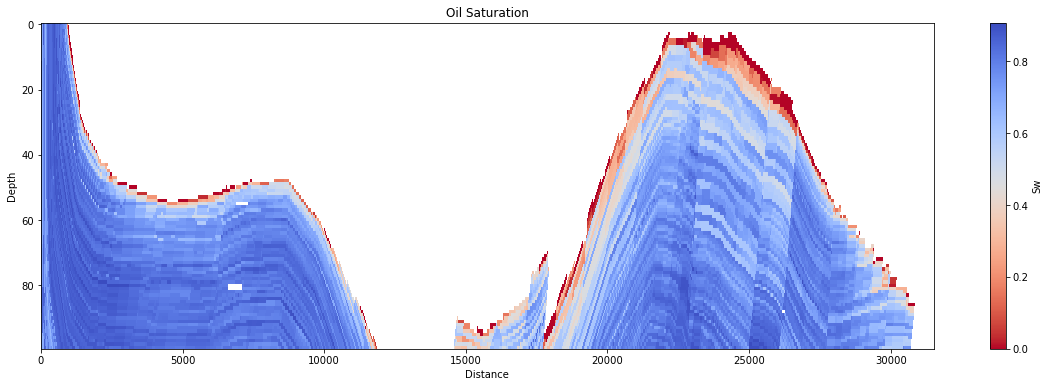

In [79]:
# we plot the array as a section with Sw distribution
fig2, ax = plt.subplots()
fig2.set_size_inches(20,6)
plt.title('Oil Saturation')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw2 = ax.imshow(oil_Sw, aspect='auto', interpolation = 'nearest', cmap = 'coolwarm_r')
bar = plt.colorbar(shw2)
bar.set_label('Sw')

In [80]:
# we clean and rotate the dataframe before make it an array, and make the numbers as float

df_Vsh = df_Vsh.iloc[:, 1::2]
df_Vsh = df_Vsh.astype(float)
arr_Vsh = np.array(df_Vsh)
arr_Vsh = np.rot90(arr_Vsh, k=1, axes=(0, 1))


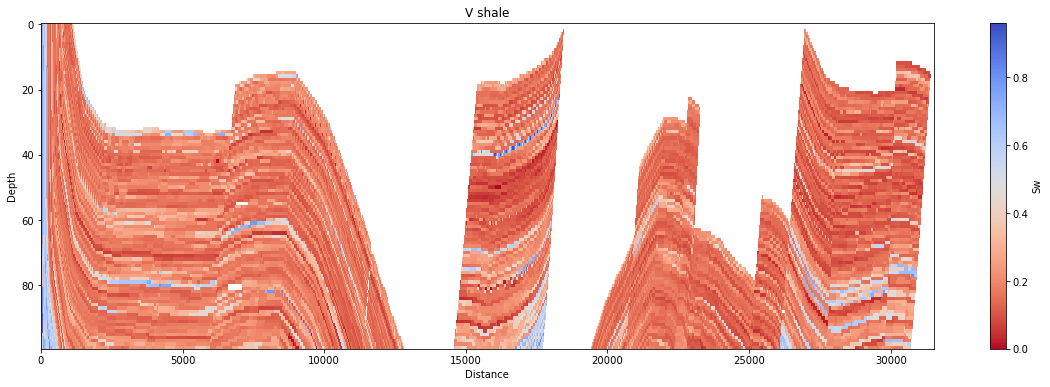

In [81]:
# we plot the array as a section with Sw distribution
fig3, ax = plt.subplots()
fig3.set_size_inches(20,6)
plt.title('V shale')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw3 = ax.imshow(arr_Vsh, aspect='auto', interpolation = 'nearest', cmap = 'coolwarm_r')
bar = plt.colorbar(shw3)
bar.set_label('Sw')

In [82]:
# here we rescale the Vshale values to perametrs of Arch equarion from 1.7 to 3.0

arr_Vsh_scaled = 1.3*(arr_Vsh)+1.7
arr_Vsh_scaled

array([[2.55423, 2.55423, 2.55423, ...,     nan,     nan,     nan],
       [2.55423, 2.55423, 2.55423, ...,     nan,     nan,     nan],
       [2.55423, 2.55423, 2.55423, ...,     nan,     nan,     nan],
       ...,
       [2.49846, 2.49846, 2.49846, ...,     nan,     nan,     nan],
       [2.49846, 2.49846, 2.49846, ...,     nan,     nan,     nan],
       [2.49846, 2.49846, 2.49846, ...,     nan,     nan,     nan]])

In [83]:
# here we define the values of the parameters m and n from Archi equation
n = 2 # saturation exponent, which varies from 1.8 to 4.0 but normally is 2.0 
m = arr_Vsh_scaled # cementation exponent, which varies from 1.7 to 3.0 but normally is 2.0 

In [84]:
# computing of the resestivity profile by  Archi equation

arr_Rt = 0.127/(arr_poro**(m)*arr_Sw**(n))

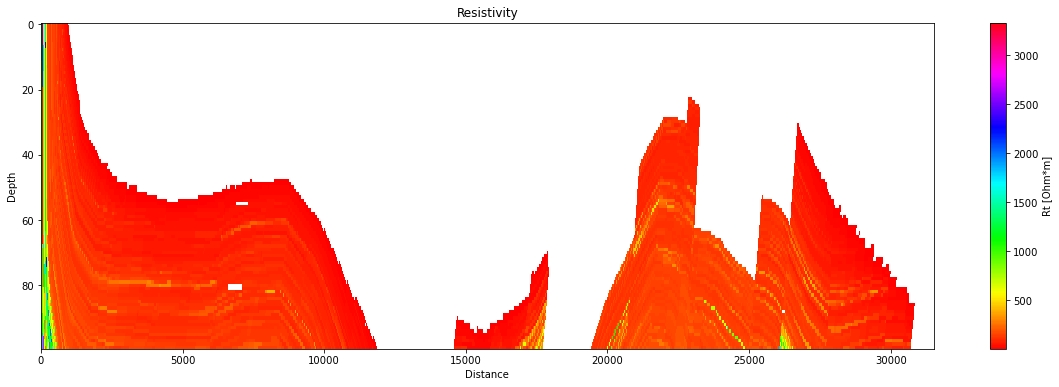

In [85]:
# we plot the array as a section with Rt distribution

fig4, ax = plt.subplots()
fig4.set_size_inches(20,6)
plt.title('Resistivity')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw4 = ax.imshow(arr_Rt, aspect='auto', interpolation = 'nearest', cmap = 'hsv')
bar = plt.colorbar(shw4)
bar.set_label('Rt [Ohm*m]')

In [86]:
# here we use imperical function to determine the porosity.  The relation is determined by lab measurements for clastic rocks

e = math.exp(1)

arr_perm = 5.8*10**(-4)* e**(44.38*arr_poro)

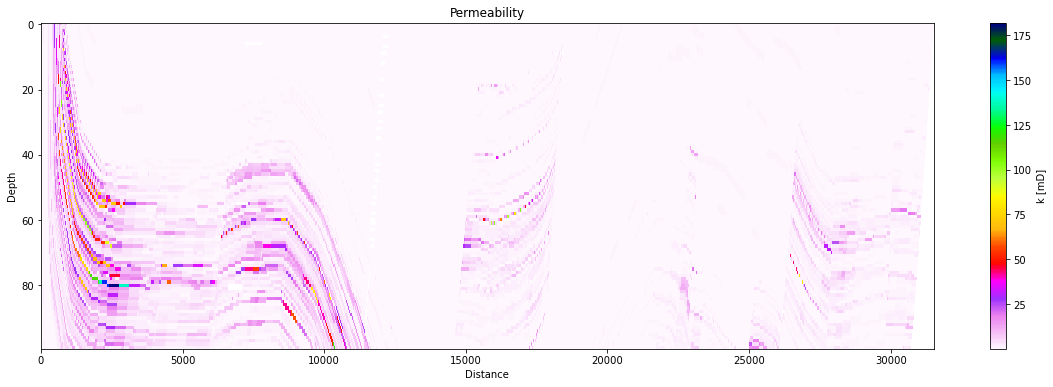

In [87]:
# we plot the array as a section with Permiability distribution

fig5, ax = plt.subplots()
fig5.set_size_inches(20,6)
plt.title('Permeability')
plt.xlabel('Distance')
plt.ylabel('Depth')
shw5 = ax.imshow(arr_perm, aspect='auto', interpolation = 'nearest', cmap = 'gist_ncar_r')
bar = plt.colorbar(shw5)
bar.set_label('k [mD]')

# Building productivity potential map

In [88]:
# df_poro.to_csv('porosity_processed.csv')
# # np.savetxt('perm_processed.csv',arr_perm)

In [89]:
# df_poro = np.rot90(arr_perm)
# arr_Sw = np.rot90(arr_Sw)

In [90]:
df_perm = pd.DataFrame(arr_perm)



df_Sw = pd.DataFrame(arr_Sw)

df_poro = pd.DataFrame(arr_poro)

# df_Sw = df_Sw.fillna(0)
# df_poro = df_poro.fillna(0)
# df_perm = df_perm.fillna(0)

In [91]:
df_poro

,0,1,2,3,4,5,6,7,8,9,...,31510,31511,31512,31513,31514,31515,31516,31517,31518,31519
0,0.0850,0.0850,0.0850,0.0850,0.0850,0.0861,0.0861,0.0861,0.0861,0.0750,...,0.1642,0.1642,0.1642,0.1642,0.1642,0.1642,0.1642,0.1642,0.1642,0.1642
1,0.0850,0.0850,0.0850,0.0850,0.0850,0.0861,0.0861,0.0861,0.0861,0.0750,...,0.0818,0.0818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0850,0.0850,0.0850,0.0850,0.0850,0.0861,0.0861,0.0861,0.0861,0.0750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0850,0.0850,0.0850,0.0850,0.0850,0.0861,0.0861,0.0861,0.0861,0.0750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0850,0.0850,0.0850,0.0850,0.0850,0.0861,0.0861,0.0861,0.0861,0.0750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0875,0.0875,0.0875,0.0875,0.0875,0.0875,0.0875,0.0776,0.0776,0.0776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0.0875,0.0875,0.0875,0.0875,0.0875,0.0875,0.0875,0.0776,0.0776,0.0776,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.0752,0.0752,0.0752,0.0752,0.0752,0.0752,0.0752,0.0758,0.0758,0.0758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.0752,0.0752,0.0752,0.0752,0.0752,0.0752,0.0752,0.0758,0.0758,0.0758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df_Sw

,0,1,2,3,4,5,6,7,8,9,...,31510,31511,31512,31513,31514,31515,31516,31517,31518,31519
0,0.24935,0.24935,0.24935,0.24935,0.24935,0.24782,0.24782,0.24782,0.24782,0.26769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.24935,0.24935,0.24935,0.24935,0.24935,0.24782,0.24782,0.24782,0.24782,0.26769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.24935,0.24935,0.24935,0.24935,0.24935,0.24782,0.24782,0.24782,0.24782,0.26769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.24935,0.24935,0.24935,0.24935,0.24935,0.24782,0.24782,0.24782,0.24782,0.26769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.24935,0.24935,0.24935,0.24935,0.24935,0.24782,0.24782,0.24782,0.24782,0.26769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.24526,0.24526,0.24526,0.24526,0.24526,0.24526,0.24526,0.26273,0.26273,0.26273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0.24526,0.24526,0.24526,0.24526,0.24526,0.24526,0.24526,0.26273,0.26273,0.26273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.26712,0.26712,0.26712,0.26712,0.26712,0.26712,0.26712,0.26635,0.26635,0.26635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.26712,0.26712,0.26712,0.26712,0.26712,0.26712,0.26712,0.26635,0.26635,0.26635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df_perm

,0,1,2,3,4,5,6,7,8,9,...,31510,31511,31512,31513,31514,31515,31516,31517,31518,31519
0,0.025218,0.025218,0.025218,0.025218,0.025218,0.026480,0.026480,0.026480,0.026480,0.016180,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
1,0.025218,0.025218,0.025218,0.025218,0.025218,0.026480,0.026480,0.026480,0.026480,0.016180,...,0.021880,0.021880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.025218,0.025218,0.025218,0.025218,0.025218,0.026480,0.026480,0.026480,0.026480,0.016180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.025218,0.025218,0.025218,0.025218,0.025218,0.026480,0.026480,0.026480,0.026480,0.016180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.025218,0.025218,0.025218,0.025218,0.025218,0.026480,0.026480,0.026480,0.026480,0.016180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.028177,0.028177,0.028177,0.028177,0.028177,0.028177,0.028177,0.018159,0.018159,0.018159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,0.028177,0.028177,0.028177,0.028177,0.028177,0.028177,0.028177,0.018159,0.018159,0.018159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.016324,0.016324,0.016324,0.016324,0.016324,0.016324,0.016324,0.016765,0.016765,0.016765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,0.016324,0.016324,0.016324,0.016324,0.016324,0.016324,0.016324,0.016765,0.016765,0.016765,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
print(df_poro.shape, df_Sw.shape,df_perm.shape)

(100, 31520) (100, 31520) (100, 31520)


In [95]:
P = np.multiply(df_perm.values,df_poro.values,df_Sw.values)

In [96]:
P.shape

(100, 31520)

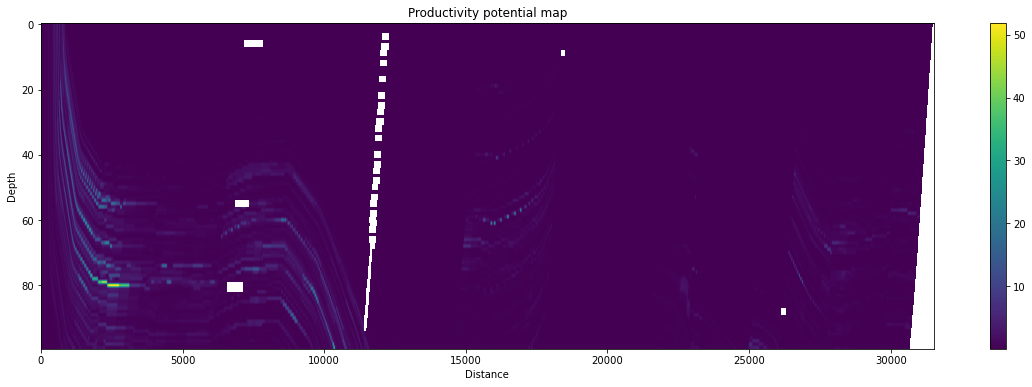

In [97]:
fig4, ax = plt.subplots()
fig4.set_size_inches(20,6)
plt.title('Productivity potential map')
plt.xlabel('Distance')
plt.ylabel('Depth')
p_map = plt.imshow(P, cmap='viridis',aspect='auto')
bar = plt.colorbar(p_map)
plt.show()

# Dataset 2

In [99]:
df_poro = pd.read_csv ('Dataset 2/Groningen dataset_2 PROCESSED_PORO.csv',low_memory=False,header=None)
df_Sw = pd.read_csv ('Dataset 2/Groningen dataset_2 PROCESSED_Sw.csv', low_memory=False, header=None)
df_perm = pd.read_csv ('Dataset 2/Groningen dataset_2 PROCESSED_perm.csv', low_memory=False, header=None)

In [100]:
df_perm

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1172.914,0.2744,1147.407,0.0017,1122.418,0.0017,1097.43,0.0017,1074.64,0.0017,...,614.901,0.0069,612.988,0.0069,611.076,0.0069,609.164,0.0069,607.252,0.0069
1,1182.914,0.2744,1157.407,0.0017,1132.418,0.0017,1107.43,0.0017,1084.64,0.0017,...,624.901,0.6229,622.988,0.6229,621.076,0.6229,619.164,0.6229,617.252,0.6229
2,1192.914,0.2744,1167.407,0.0506,1142.418,0.0017,1117.43,0.0017,1094.64,0.0017,...,634.901,0.1034,632.988,0.1034,631.076,0.1034,629.164,0.1034,627.252,0.1034
3,1202.914,0.2744,1177.407,0.2744,1152.418,0.0017,1127.43,0.0017,1104.64,0.0017,...,644.901,0.0429,642.988,0.0429,641.076,0.0429,639.164,0.0429,637.252,0.0429
4,1212.914,0.2744,1187.407,0.2744,1162.418,0.0017,1137.43,0.0017,1114.64,0.0017,...,654.901,0.1663,652.988,0.1663,651.076,0.1663,649.164,0.6871,647.252,0.6871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41354.901,65.1845,41352.988,149.7341,41351.076,83.4140,41349.164,162.0145,41347.252,15.4961
4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41364.901,65.1845,41362.988,149.7341,41361.076,83.4140,41359.164,162.0145,41357.252,15.4961
4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41374.901,131.6357,41372.988,187.1338,41371.076,35.3688,41369.164,162.0145,41367.252,15.4961
4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41384.901,131.6357,41382.988,187.1338,41381.076,35.3688,41379.164,223.7884,41377.252,52.9714


In [101]:
df_poro

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1172.914,0.04,1147.407,0.04,1122.418,0.04,1097.43,0.04,1074.64,0.04,...,614.901,0.0400,612.988,0.0400,611.076,0.0400,609.164,0.0400,607.252,0.0400
1,1182.914,0.04,1157.407,0.04,1132.418,0.04,1107.43,0.04,1084.64,0.04,...,624.901,0.0715,622.988,0.0715,621.076,0.0715,619.164,0.0715,617.252,0.0715
2,1192.914,0.04,1167.407,0.04,1142.418,0.04,1117.43,0.04,1094.64,0.04,...,634.901,0.0504,632.988,0.0504,631.076,0.0504,629.164,0.0504,627.252,0.0504
3,1202.914,0.04,1177.407,0.04,1152.418,0.04,1127.43,0.04,1104.64,0.04,...,644.901,0.0458,642.988,0.0458,641.076,0.0458,639.164,0.0458,637.252,0.0458
4,1212.914,0.04,1187.407,0.04,1162.418,0.04,1137.43,0.04,1114.64,0.04,...,654.901,0.0680,652.988,0.0680,651.076,0.0680,649.164,0.0797,647.252,0.0797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41354.901,0.1871,41352.988,0.2242,41351.076,0.1909,41349.164,0.1815,41347.252,0.1657
4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41364.901,0.1871,41362.988,0.2242,41361.076,0.1909,41359.164,0.1815,41357.252,0.1657
4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41374.901,0.1925,41372.988,0.2045,41371.076,0.1855,41369.164,0.1815,41367.252,0.1657
4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41384.901,0.1925,41382.988,0.2045,41381.076,0.1855,41379.164,0.1950,41377.252,0.1588


In [102]:
df_Sw

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1172.914,0.3766,1147.407,0.37712,1122.418,0.37712,1097.43,0.37712,1074.64,0.37712,...,614.901,0.39231,612.988,0.392310,611.076,0.39231,609.164,0.39231,607.252,0.39231
1,1182.914,0.3766,1157.407,0.37712,1132.418,0.37712,1107.43,0.37712,1084.64,0.37712,...,624.901,0.31907,622.988,0.319070,621.076,0.31907,619.164,0.31907,617.252,0.31907
2,1192.914,0.3766,1167.407,0.37708,1142.418,0.37712,1117.43,0.37712,1094.64,0.37712,...,634.901,0.36917,632.988,0.369170,631.076,0.36917,629.164,0.36917,627.252,0.36917
3,1202.914,0.3766,1177.407,0.37660,1152.418,0.37712,1127.43,0.37712,1104.64,0.37712,...,644.901,0.38573,642.988,0.385730,641.076,0.38573,639.164,0.38573,637.252,0.38573
4,1212.914,0.3766,1187.407,0.37660,1162.418,0.37712,1137.43,0.37712,1114.64,0.37712,...,654.901,0.33466,652.988,0.334660,651.076,0.33466,649.164,0.31062,647.252,0.31062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41354.901,0.12405,41352.988,0.096463,41351.076,0.12122,41349.164,0.12943,41347.252,0.14439
4075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41364.901,0.12405,41362.988,0.096463,41361.076,0.12122,41359.164,0.12943,41357.252,0.14439
4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41374.901,0.11975,41372.988,0.110520,41371.076,0.12590,41369.164,0.12943,41367.252,0.14439
4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41384.901,0.11975,41382.988,0.110520,41381.076,0.12590,41379.164,0.11821,41377.252,0.15160


In [103]:
P = np.multiply(df_poro.values,df_Sw.values,df_perm.values)

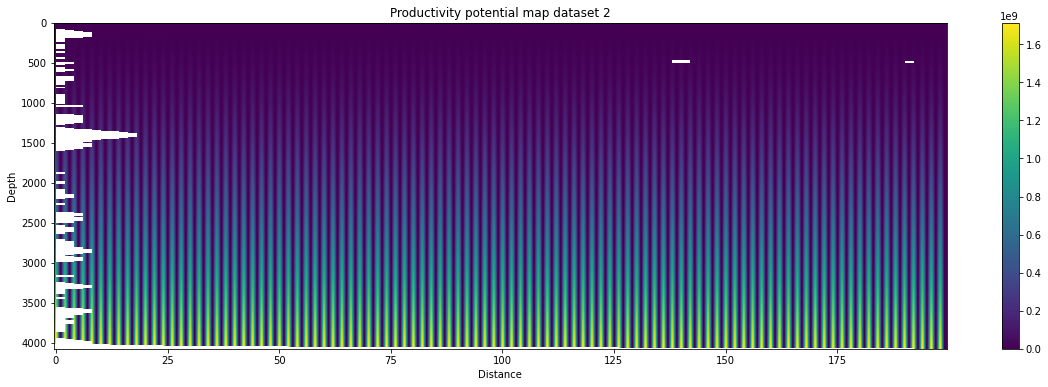

In [105]:
fig4, ax = plt.subplots()
fig4.set_size_inches(20,6)
plt.title('Productivity potential map dataset 2')
plt.xlabel('Distance')
plt.ylabel('Depth')
p_map = plt.imshow(P, cmap='viridis',aspect='auto')
bar = plt.colorbar(p_map)
plt.show()